In [12]:
import pandas as pd
import numpy as np
import os
import datetime as datetime
import matplotlib.pyplot as plt

# Parameters

In [2]:
PATH_ROOT_DATA = 'C:\\Users\\c.lopez.de.munain\Documents\\covid_19'
INPUT_DATA_NAME = 'COVID-19-geographic-disbtribution-worldwide-2020-03-14_1.xls'

# Import Data

In [3]:
covid19_data = pd.read_excel(os.path.join(PATH_ROOT_DATA,INPUT_DATA_NAME))

In [4]:
covid19_data.head()

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA
1,2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2,2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA
3,2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA
4,2020-02-29,Afghanistan,0,0,AF,NaN,Non-EU/EEA


In [5]:
covid19_data.dtypes

DateRep         datetime64[ns]
CountryExp              object
NewConfCases             int64
NewDeaths                int64
GeoId                   object
Gaul1Nuts1              object
EU                      object
dtype: object

In [6]:
covid19_data.shape

(5001, 7)

In [7]:
covid19_data.set_index('DateRep', inplace=True)

In [15]:
covid19_data.head()

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
DateRep,,,,,,
2020-03-11,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2020-03-08,Afghanistan,3,0,AF,NaN,Non-EU/EEA
2020-03-02,Afghanistan,0,0,AF,NaN,Non-EU/EEA
2020-03-01,Afghanistan,0,0,AF,NaN,Non-EU/EEA
2020-02-29,Afghanistan,0,0,AF,NaN,Non-EU/EEA


# Plot exploration

In [9]:
covid19_data_bydate = covid19_data.groupby(covid19_data.index)['NewConfCases'].sum()

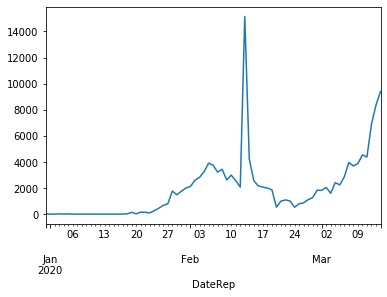

In [14]:
covid19_data_bydate.plot()

In [17]:
covid19_data_bydate[covid19_data_bydate.values >= 12000]

DateRep
2020-02-13    15151
Name: NewConfCases, dtype: int64

In [20]:
covid19_data[covid19_data.index == '2020-02-13']

,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
DateRep,,,,,,
2020-02-13,Afghanistan,0,0,AF,NaN,Non-EU/EEA
2020-02-13,Algeria,0,0,DZ,NaN,Non-EU/EEA
2020-02-13,Armenia,0,0,AM,NaN,Non-EU/EEA
2020-02-13,Australia,0,0,AU,NaN,Non-EU/EEA
2020-02-13,Austria,0,0,AT,NaN,EU
2020-02-13,Azerbaijan,0,0,AZ,NaN,Non-EU/EEA
2020-02-13,Bahrain,0,0,BH,NaN,Non-EU/EEA
2020-02-13,Belarus,0,0,BY,NaN,Non-EU/EEA
2020-02-13,Belgium,0,0,BE,NaN,EU


In [21]:
# Because Chine has an outlier probably for reporting but not real cases, I'm separating china
covid19_data_china = covid19_data[covid19_data['CountryExp'] == 'China']
covid19_data_nonchina = covid19_data[covid19_data['CountryExp'] != 'China']

### China 

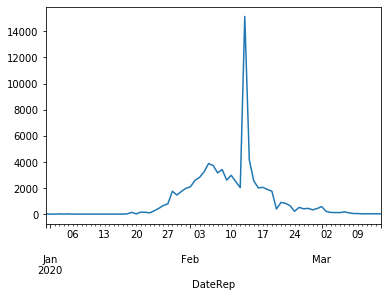

In [22]:
covid19_data_bydate_china = covid19_data_china.groupby(covid19_data_china.index)['NewConfCases'].sum()
covid19_data_bydate_china.plot()

### Non China

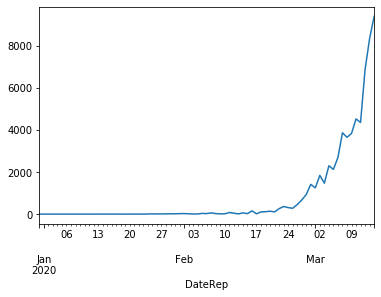

In [24]:
covid19_data_bydate_nonchina = covid19_data_nonchina.groupby(covid19_data_nonchina.index)['NewConfCases'].sum()
covid19_data_bydate_nonchina.plot()

#### Countries worst infected

In [34]:
covid19_data_nonchina.groupby(['CountryExp'])['NewConfCases'].sum().sort_values(ascending=False).head(10)

CountryExp
Italy                       17660
Iran                        11364
South Korea                  8086
Spain                        4231
France                       3661
Germany                      3062
United States of America     2174
Switzerland                   854
Denmark                       804
Netherlands                   804
Name: NewConfCases, dtype: int64

#### Italy

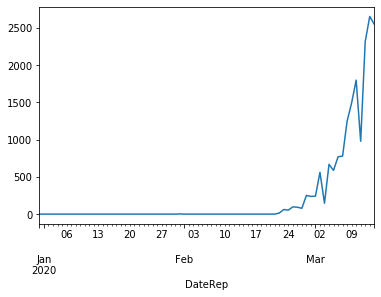

In [36]:
country_filter = 'Italy'
covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].groupby(covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].index)['NewConfCases'].sum().plot()

#### Iran

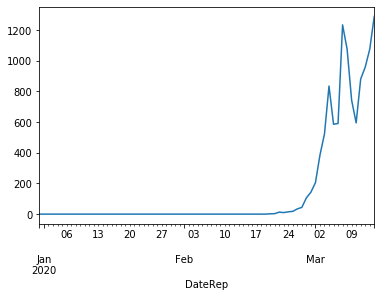

In [35]:
country_filter = 'Iran'
covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].groupby(covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].index)['NewConfCases'].sum().plot()

#### South Korea

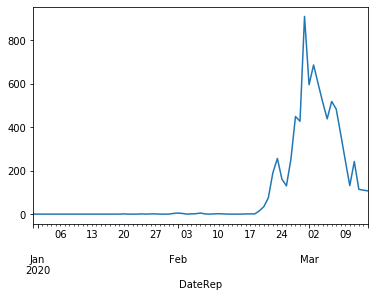

In [37]:
country_filter = 'South Korea'
covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].groupby(covid19_data_nonchina[covid19_data_nonchina['CountryExp'] == country_filter].index)['NewConfCases'].sum().plot()

Approx at 200 cases contagion seems to get out of control